# Monte Carlo Simulation of Ising Model with Metropolis Algorithm

This assignment explores the Ising model with a Monte Carlo simulation. This model predicts the interactions of particles on a lattice with either spin 'up' or 'down' (this is determined randomly). 

In [2]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### 1. Set up the initial arrangements of spins

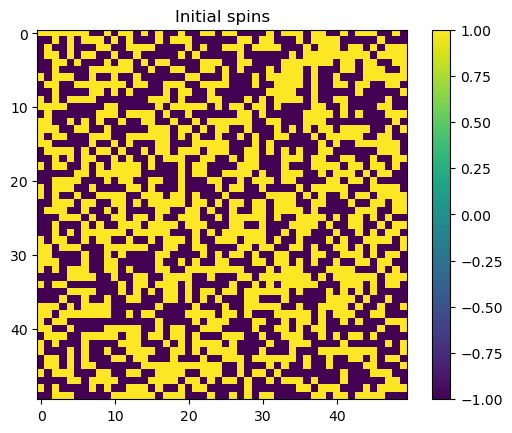

In [3]:
# Initialising variables
boxlen = 50
B_over_kT = 0
J_over_kT = 0.5

# Creating array of spins
spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))
plt.imshow(spins)
plt.title('Initial spins')
plt.colorbar()

The above plot confirms that the spins generated in the box are indeed random.

### 2. Calculate the energy

The total energy is calculated from the formula
$$
\begin{align}
E &= -\sum_{i,j} Js_is_j - \sum_i Bms_i \\
&= -\sum_i s_i\left( mB + J \sum_j s_j \right)
\end{align}
$$

where $J$ is the quantum mechanical exchange coupling between spins, $s$ is the spin at a lattice site, $B$ is the magnetic field strength, and $m=1/2$.

In [4]:
sum_neigh_spins = (np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1))
etot0 = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
print("Starting energy is ",etot0)

Starting energy is  -32.0


### 3. Write the swap function



In [5]:
def update_swap(spins, i1,j1,i2,j2):
    """
    Update swap for MC Ising model

    Inputs:
    i1, i2,    Location of spin to swap
    j1, j2  

    Output:
    de         Change in energy
    """
    i1m1 = (i1 - 1)%boxlen
    i1p1 = (i1 + 1)%boxlen
    j1m1 = (j1 - 1)%boxlen
    j1p1 = (j1 + 1)%boxlen
    sum_neigh_spins1 = spins[i1m1,j1] + spins[i1p1,j1] + spins[i1,j1m1] + spins[i1,j1p1]
    i2m1 = (i2 - 1)%boxlen
    i2p1 = (i2 + 1)%boxlen
    j2m1 = (j2 - 1)%boxlen
    j2p1 = (j2 + 1)%boxlen
    sum_neigh_spins2 = spins[i2m1,j2] + spins[i2p1,j2] + spins[i2,j2m1] + spins[i2,j2p1]
    diff_spins = sum_neigh_spins1 - sum_neigh_spins2
    # The change in energy
    de = 2*(spins[i1,j1]-spins[i2,j2])*(J_over_kT*diff_spins + B_over_kT)
    p = np.exp(-de)
    if de < 0 or rng.random() < p:
        # Swapping spins
        spins_temp1 = np.copy(spins[i1,j1])
        spins_temp2 = np.copy(spins[i2,j2])
        spins[i1,j1] = spins_temp2
        spins[i2,j2] = spins_temp1
    else:
        de = 0.0
    return de

### 4. Run the simulation

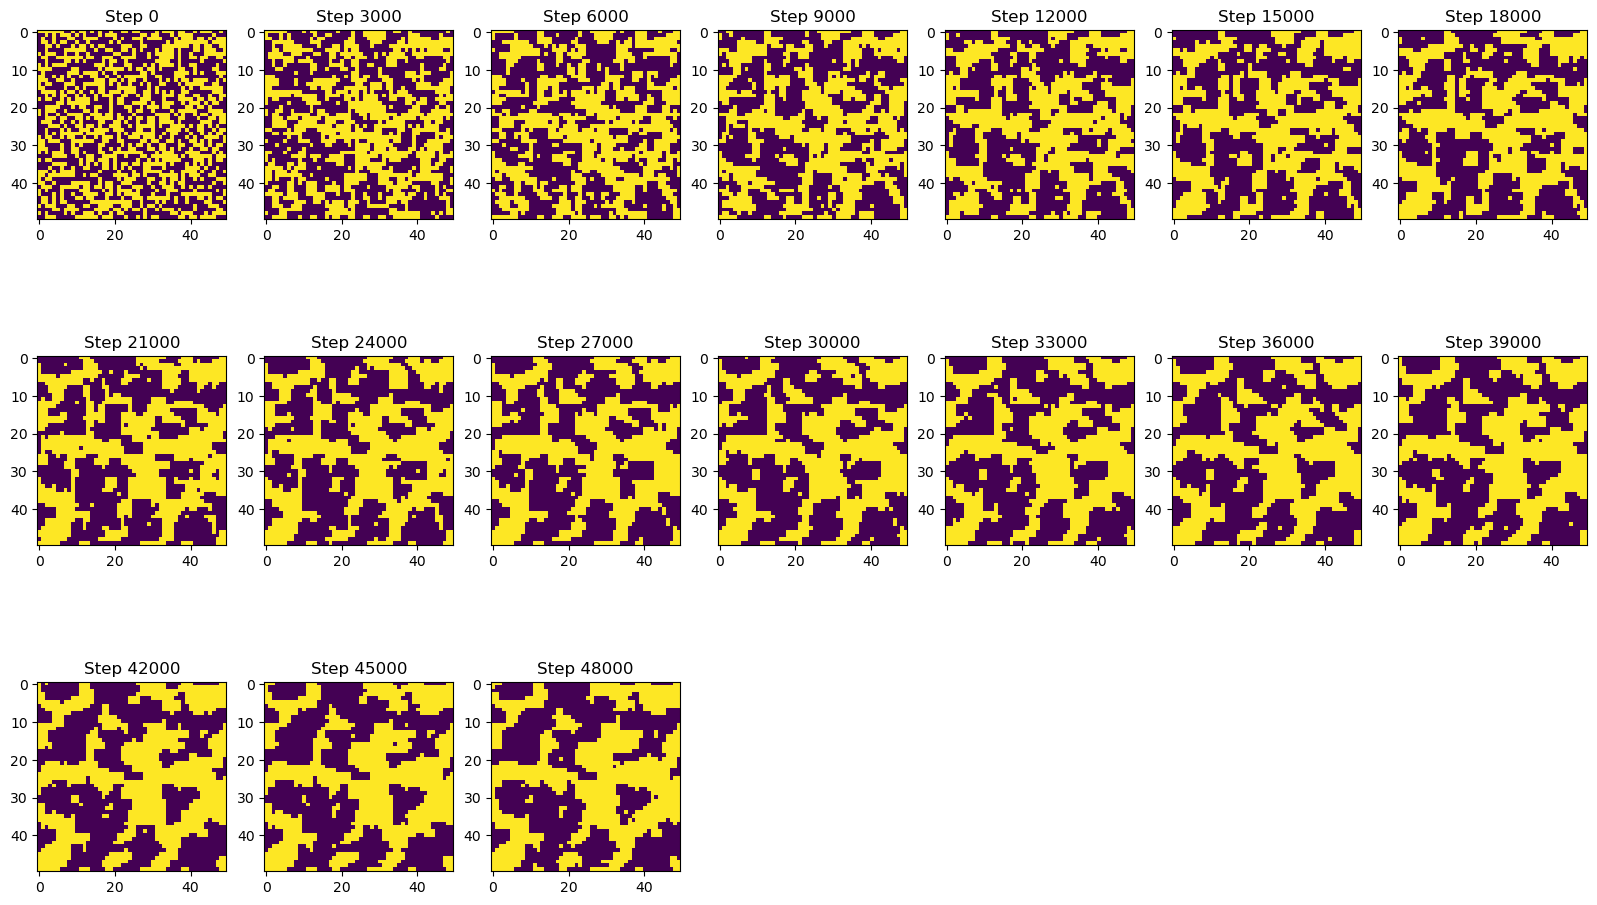

In [6]:
Nsteps = 50000
etot = np.zeros(Nsteps+1)
etot[0] = etot0
figIsing = plt.figure(figsize=(20,12))
index = 1
for i in range(Nsteps):
    # Selecting two points at random to test
    this_i1, this_j1 = rng.integers(boxlen), rng.integers(boxlen)
    this_i2, this_j2 = rng.integers(boxlen), rng.integers(boxlen)
    de = update_swap(spins,this_i1,this_j1,this_i2,this_j2)
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                       np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    if i%3000==0:
        ax = figIsing.add_subplot(3,7,index)
        ax.imshow(spins)
        ax.set_title(f'Step {i}')
        index +=1 

### 5. Show total energy


Text(0, 0.5, 'E/kT')

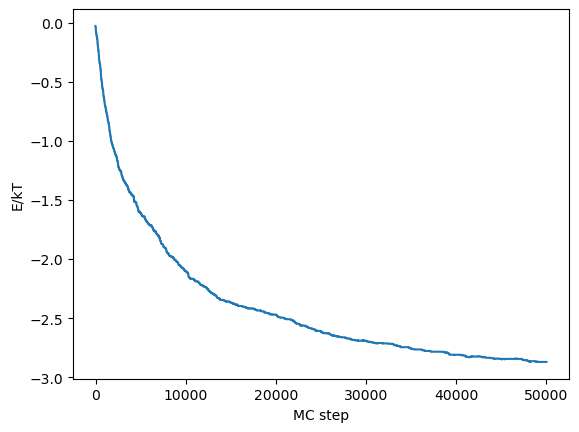

In [7]:
plt.plot(etot/(len(spins)**2 * J_over_kT))
plt.xlabel('MC step')
plt.ylabel('E/kT')


Starting energy is  -176.0


Text(0, 0.5, 'E/kT')

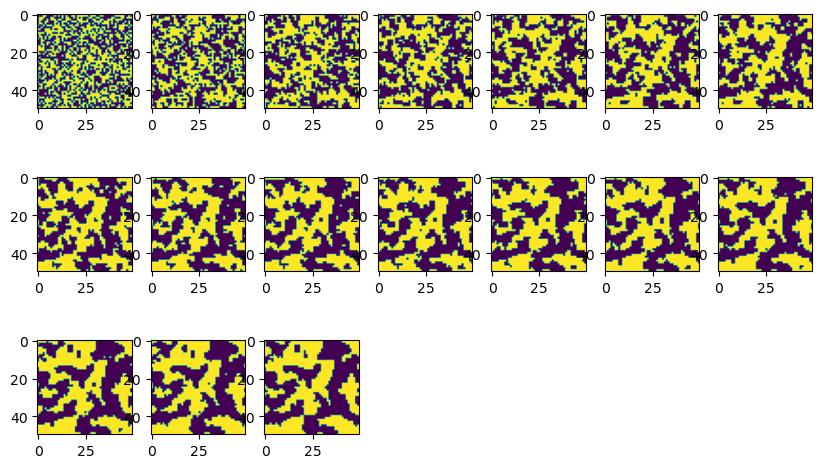

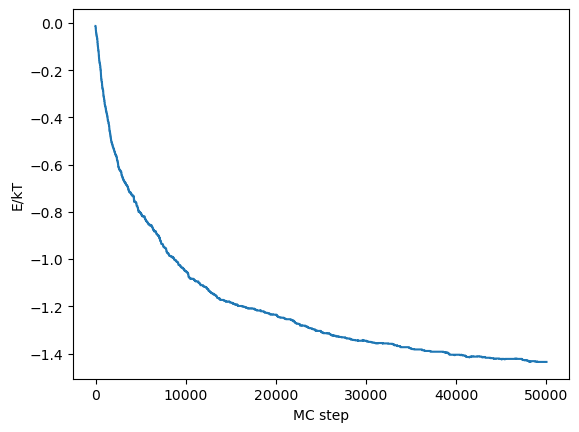

In [8]:
J_over_kT = 1.0
# Repeating simulation

spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))
sum_neigh_spins = (np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1))
etot0 = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
print("Starting energy is ",etot0)

etot1 = np.zeros(Nsteps+1)
etot1[0] = etot0
figIsing = plt.figure(figsize=(10,6))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen), rng.integers(boxlen)
    this_i2, this_j2 = rng.integers(boxlen), rng.integers(boxlen)
    de = update_swap(spins,this_i1,this_j1,this_i2,this_j2)
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                       np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot1[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    if i%3000==0:
        ax = figIsing.add_subplot(3,7,index)
        ax.imshow(spins)
        index +=1 

plt.figure()
plt.plot(etot/(len(spins)**2 * J_over_kT))
plt.xlabel('MC step')
plt.ylabel('E/kT')

Text(0, 0.5, '$\\Delta $E/kT')

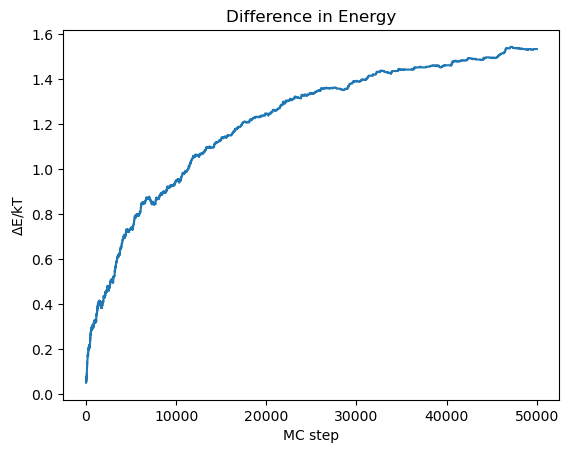

In [10]:
plt.plot((etot-etot1)/(len(spins)**2 * J_over_kT))
plt.title('Difference in Energy')
plt.xlabel('MC step')
plt.ylabel(r'$\Delta $E/kT')

## Conclusion


As can be seen in both plots, there is a difference between the final energies in both cases. The final energy of the second plot differs by almost a factor of two, though both happen to display a similar rate of change. 